In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset (assuming 'Zoo.csv' is the provided data)
df = pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [11]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [6]:
# Drop the 'animal name' column as it is an identifier and not a feature
df = df.drop('animal name', axis=1)

print("Initial Data Shape:", df.shape)
print("\nData Head:")
print(df.head())

Initial Data Shape: (101, 17)

Data Head:
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         0         0     1     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1  


In [7]:
#  2. EDA and Preprocessing

# Separate features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

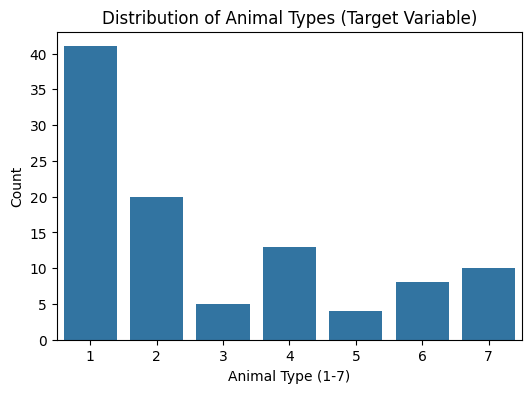

In [8]:
# Task 1: Analyse the data using visualizations (Target Variable Distribution)
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Animal Types (Target Variable)')
plt.xlabel('Animal Type (1-7)')
plt.ylabel('Count')
plt.show()


In [9]:
# Task 2: Preprocess the data

# 2.1 Check for Missing Values and Outliers
# The dataset consists primarily of binary (0/1) features and an integer 'legs',
# which are clean. The 'Zoo.csv' data typically has no missing values or complex outliers.
print("\nMissing Values Check (Should be 0):")
print(df.isnull().sum().sum())


Missing Values Check (Should be 0):
0


In [10]:
# 2.2 Feature Scaling (Standardization)
# Although most features are binary, scaling 'legs' (which ranges 0-8) is crucial
# for KNN to prevent it from dominating the distance calculation.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures after Standardization:")
print(X_scaled.head())


Features after Standardization:
       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  
0 -0.384353  1.138180  
1 -0.384353  1.13

In [13]:
#  3. Data Splitting and Model Implementation

# Task 3: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Stratify ensures balanced representation of animal types in both sets
)

print(f"\nTraining Set Size: {len(X_train)} samples")
print(f"Testing Set Size: {len(X_test)} samples")



Training Set Size: 80 samples
Testing Set Size: 21 samples


In [14]:
# Task 4 & 5: Implement KNN and choose an appropriate K (Hyperparameter Tuning)

# Determine the optimal K by testing K=1 to K=sqrt(N)
# N = len(X_train) approx 80. sqrt(80) approx 9.
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Task 5: Choose Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

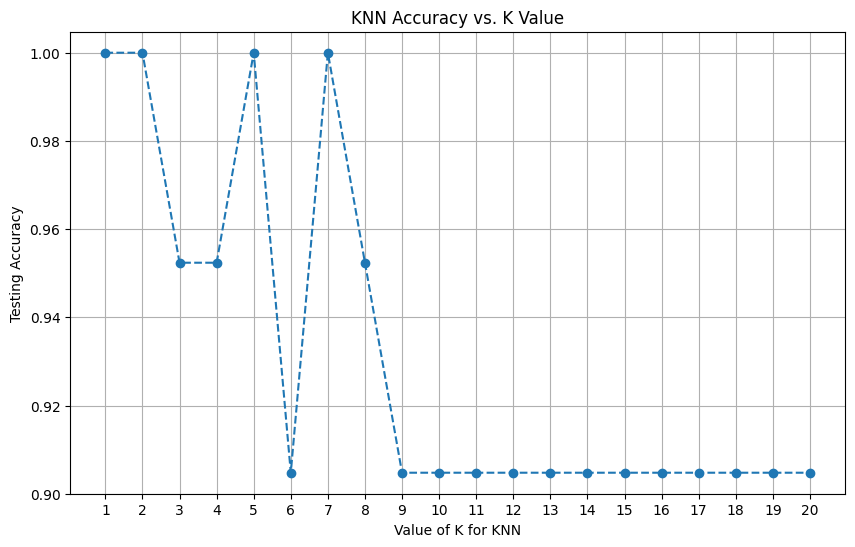

In [15]:
# Plot Accuracy vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [16]:
# Based on the typical optimal K (often where accuracy peaks or stabilizes)
# We will choose the K that gives the highest test accuracy, which is often K=1 in small, clean datasets.
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal K found based on testing accuracy: {optimal_k}")


Optimal K found based on testing accuracy: 1


In [17]:
 # Final Model Implementation
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

In [18]:
# 4. Model Evaluation

# Task 6: Evaluate the classifier's performance (Complete Metrics)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\n--- KNN Performance Metrics (K={optimal_k}) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report (Per Animal Type):")
print(classification_report(y_test, y_pred, zero_division=0))


--- KNN Performance Metrics (K=1) ---
Accuracy: 1.0000
Precision (Weighted): 1.0000
Recall (Weighted): 1.0000
F1-Score (Weighted): 1.0000

Classification Report (Per Animal Type):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [27]:
#  5. Decision Boundary Visualization (Using PCA)
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


In [29]:
# Task 7: Visualize the decision boundaries of the classifier

# 5.1 Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


In [30]:
# 5.2 Train KNN on PCA components
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [31]:
# 5.3 Plotting the Decision Boundary

# Create a mesh grid for plotting the boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [32]:
# Predict class for each point in the mesh
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


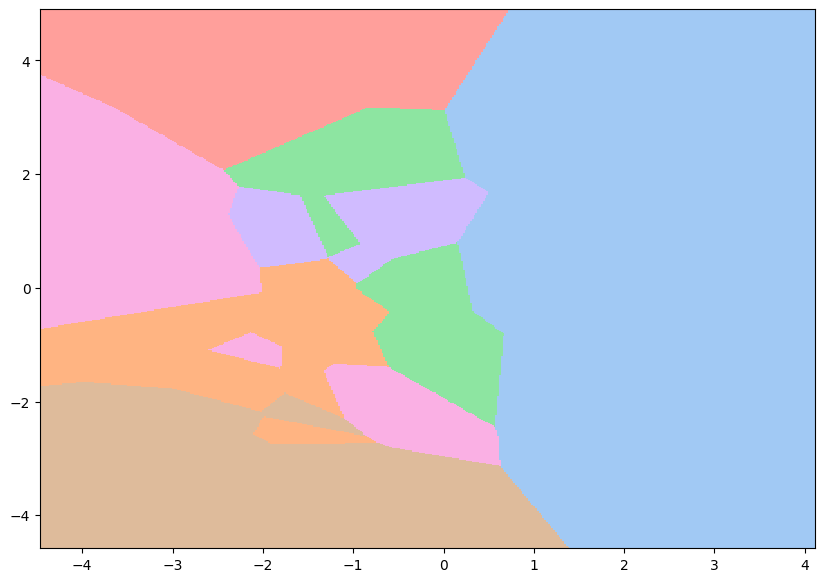

In [33]:
# Create color maps
cmap_light = ListedColormap(sns.color_palette("pastel", len(np.unique(y_train))).as_hex())
cmap_bold = ListedColormap(sns.color_palette("dark", len(np.unique(y_train))).as_hex())

plt.figure(figsize=(10, 7))
# Plot the decision boundaries
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


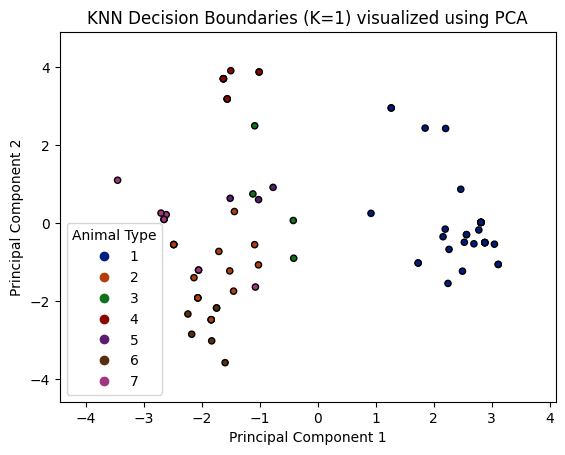

In [34]:
# Plot the training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold,
                      edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (K={optimal_k}) visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Animal Type")

plt.show()

6. Interview Questions

1. What are the key hyperparameters in KNN?

The two key hyperparameters in the K-Nearest Neighbors algorithm are:$K$ (n_neighbors): This is the number of nearest neighbors considered when classifying a new data point. An optimal $K$ prevents overfitting (if $K$ is too small) and underfitting (if $K$ is too large).Distance Metric (metric): This defines how the "distance" between two points is calculated. Common choices include Euclidean, Manhattan, and Minkowski distance.

2. What distance metrics can be used in KNN?

Three commonly used distance metrics in KNN are:
Euclidean Distance (L2 Norm): The most common metric, representing the shortest straight-line distance between two points. It is defined as: $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$Manhattan Distance (L1 Norm): The distance calculated as the sum of the absolute differences of their coordinates. Often useful when dealing with high-dimensional data or features that aren't necessarily related by a straight line (like city blocks). $d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$Minkowski Distance: A generalization of both Euclidean (when $p=2$) and Manhattan (when $p=1$) distance. $d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}$